In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas 
import geopandas
!pip install contextily
import contextily as ctx 

     |████████████████████████████████| 1.0 MB 4.5 MB/s 
     |████████████████████████████████| 6.3 MB 46.1 MB/s 
     |████████████████████████████████| 15.4 MB 25.4 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
parchi=geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Parchi_regionali_e_nazionali_polygon/Parchi_regionali_e_nazionali_polygon.dbf')
comuni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Com01012021_g")
province = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/ProvCM01012021_g")
regioni = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Reg01012021_g")
piste_ciclabili = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/bike_ciclabili/bike_ciclabili.dbf')
quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm/NIL_WM.dbf')
fontanelle = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Fontanelle.zip")
corsi = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Corsi_acqua_Piano_di_Gestione.zip")

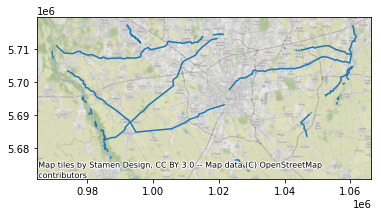

In [ ]:
#1. visualizzi su una mappa i 10 corsi d'acqua più lunghi della provincia di Milano
milano=province[province.DEN_UTS == 'Milano']#prnede milano
corsi_milano = corsi[corsi.intersects(milano.unary_union)]#fiumi che cappano per la provincia milano
ax = corsi_milano.sort_values('SHAPE_LEN',ascending=False).head(10).to_crs(epsg=3857).plot()
ctx.add_basemap(ax)

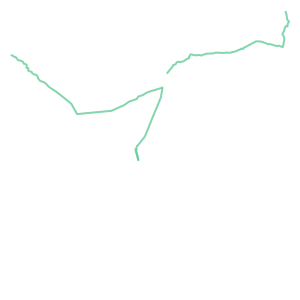

In [ ]:
navigli_uniti = navigli.unary_union
navigli_uniti

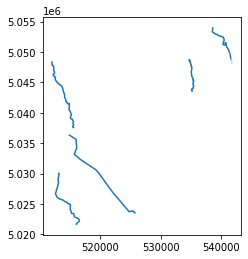

In [ ]:
fiumi = corsi[corsi.touches(navigli_uniti)]
fiumi.plot(
    
)

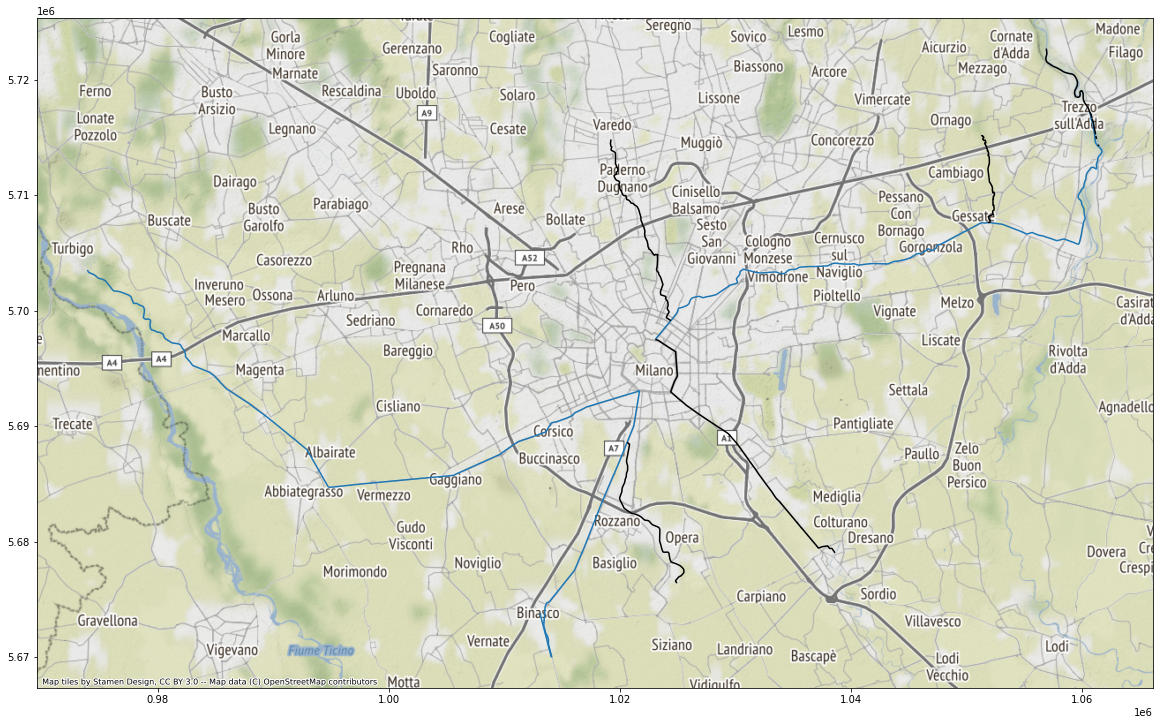

In [ ]:
#2. visualizzi su una mappa i Navigli e i fiumi da cui prendono l'acqua. Utilizzare colori diversi per rappresentare i navigli rispetto ai fiumi ed evidenziare bene i percorsi sulla mappa
navigli = corsi[corsi.NOME.str.contains('Navigli')]
ax = navigli.to_crs(epsg=3857).plot(figsize=(20,15))
fiumi.to_crs(epsg=3857).plot(ax=ax,color='k')
ctx.add_basemap(ax)

In [ ]:
navigli[navigli.NOME.str.contains('Navigliaccio') ].to_crs(epsg=3857).plot()

ins comune Milano


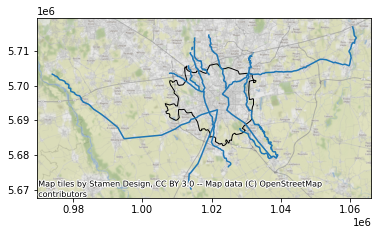

In [ ]:
#. visualizzi su una mappa i corsi d'acqua che passano in un comune inserito dall'utente
com = input('ins comune ')
com_ins = comuni[comuni.COMUNE == com]
corsi_attr = corsi[corsi.crosses(com_ins.unary_union)]

ax = corsi_attr.to_crs(epsg=3857).plot()
com_ins.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
ctx.add_basemap(ax)

In [ ]:
corsi

In [ ]:
#4. visualizzi su una mappa un fiume inserito dall'utente con tutti i comuni  che attraversa. Se attraversa Milano, visualizzare solo i quartieri che attraversa
fiu = input('ins fiume ')
fium = corsi[corsi.NOME == fiu]
com_attr = comuni[comuni.intersects(fium.geometry.squeeze())]
quart_attr = quartieri[quartieri.intersects(fium.geometry.squeeze())]

ax = com_attr.to_crs(epsg=3857).plot(figsize=(20,15),facecolr='none',edgecolor='k')
fium.to_crs(epsg=3857).plot(ax=ax)
quart_attr.to_crs(epsg=3857).plot(ax=ax,edgecolor='b',facecolor='none')
ctx.add_basemap(ax)

In [ ]:
user = input("Nome fiume: ")
lst = list(corsi['NOME'])
if user not in lst:
  print("Comune inesistente")
else:
  Comune_User = comuni[comuni.COMUNE==user]
  CorsiComune = corsi[corsi.intersects(Comune_User.unary_union)]
  ax = CorsiComune.to_crs(epsg=3857).plot(figsize=(20,12),facecolor='none',edgecolor='k')
  Comune_User.to_crs(epsg=3857).plot(ax=ax,facecolor='none',edgecolor='k')
  ctx.add_basemap(ax)

Nome fiume: bresso
Comune inesistente
